In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import Counter
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from matplotlib.backends.backend_pdf import PdfPages
import warnings

# Suppress all user warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [147]:
data = pd.read_excel('Messages - Livin n Learnin.xlsx')
pdf = PdfPages('all_charts.pdf')

In [148]:
# Data cleaning

data.loc[data["Sender ID"] == 'samiehazari@mail.usf.edu', 'Sender Name'] = 'Samie'
data['Sender Name'] = data['Sender Name'].fillna('Logan')
data = data.drop(columns = ['Sender ID'])
values_to_drop = ['Notification']
data = data[~data['Type'].isin(values_to_drop)]
data = data.drop(columns = ['Service', 'Attachment', 'Subject', 'Status', 'Delivered Date', 'Read Date', 'Type', 'Edited Date'])
data = data.reset_index(drop=True)
data['Text'] = data['Text'].astype(str)
data['Attachment type'] = data['Attachment type'].astype(str)
data['Sender Name'] = data['Sender Name'].replace({'Jake M': 'Jake', 'Steve H': 'Steve', 'Matt Charlton': 'Matt', 
                                                  'Paul Demarco': 'Paul', 'Nick Mob⌨️🛰🛩': 'Nicky', 'Garrett H': 'Garrett', 
                                                  'Joel Cruz Official': 'Joel', 'Nico Dilo': 'Nico', 'Reily G': 'Riley', 
                                                  'Brett🇺🇸': 'Brett', 'Kyle E': 'Kyle', 'Will Fuentes': 'Will'})


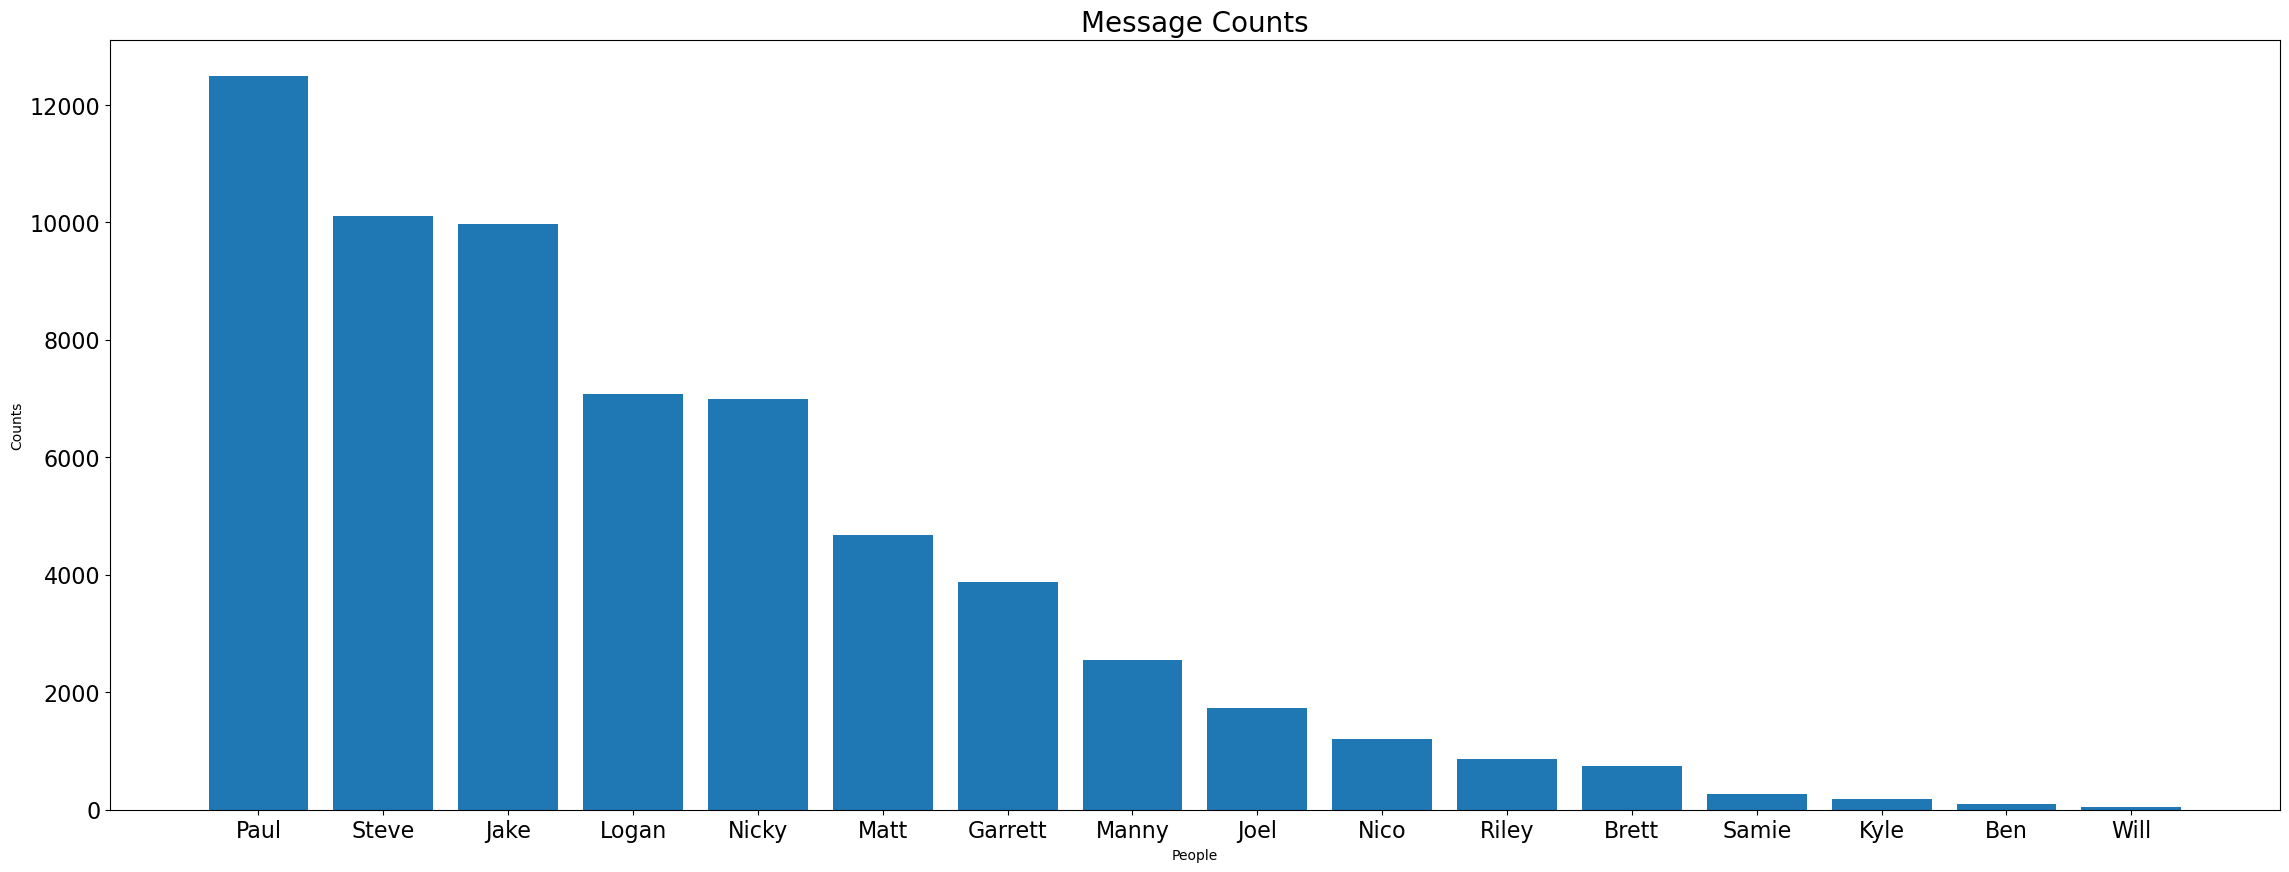

[('Paul', 12486), ('Steve', 10115), ('Jake', 9974), ('Logan', 7078), ('Nicky', 6987), ('Matt', 4675), ('Garrett', 3877), ('Manny', 2555), ('Joel', 1727), ('Nico', 1210), ('Riley', 869), ('Brett', 742), ('Samie', 270), ('Kyle', 179), ('Ben', 99), ('Will', 45)]


In [151]:
names = data['Sender Name']
total_message_count = Counter(names)
total_message_counts = [(element, count) for element, count in total_message_count.items()]
total_message_counts = sorted(total_message_counts, key = lambda x: x[1], reverse = True)

elements = [item[0] for item in total_message_counts]
counts = [item[1] for item in total_message_counts]

# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(elements, counts)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('Counts')
plt.title('Message Counts', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

print(total_message_counts)

In [152]:
def is_like(text):
    if text.startswith('Liked'):
        return True
    else:
        return False
    
def is_love(text):
    if text.startswith('Loved'):
        return True
    else:
        return False

def is_dislike(text):
    if text.startswith('Disliked'):
        return True
    else:
        return False
    
def is_question(text):
    if text.startswith('Questioned'):
        return True
    else:
        return False
    
def is_laugh(text):
    if text.startswith('Laughed'):
        return True
    else:
        return False
    
def is_exclaim(text):
    if text.startswith('Emphasized'):
        return True
    else:
        return False
    
def is_reaction(text):
    switch = {0: is_like(text),
             1: is_love(text),
             2: is_dislike(text),
             3: is_question(text),
             4: is_laugh(text),
             5: is_exclaim(text)}
    for i in range(0,6):
        if switch.get(i) == True:
            return True
    return False

def is_reaction_type(text):
    switch = {0: is_like(text),
             1: is_love(text),
             2: is_dislike(text),
             3: is_question(text),
             4: is_laugh(text),
             5: is_exclaim(text)}
    react_dict = {0: 'like', 1: 'love', 2: 'dislike', 3: 'question', 4: 'laugh', 5: 'exclaim'}
    for i in range(0,6):
        if switch.get(i) == True:
            return react_dict[i]
    return False

def get_number_from_tuples(name, tuple_list):
    for n, number in tuple_list:
        if n == name:
            return number
    return None
        
def distance(v1, v2):
    distance = np.linalg.norm(v1 - v2)
    return distance
    
def adjacency_matrix(data, threshold):

    rows = len(data) 
    adj_matrix = np.zeros((rows, rows))
    for i in range(rows):
        for j in range(rows):
            if i == j:
                continue
            x = distance(data[i], data[j])
            if x <= threshold:
                adj_matrix[i][j] = 1
    return adj_matrix

In [153]:
means = []

for i in data["Sender Name"].unique():
    text_lengths = []
    for j in range(len(data)):
        if data['Sender Name'][j] == i and (is_reaction(data['Text'][j]) == False) and (data['Attachment type'][j] == 'nan'):
            text_lengths.append(len(data['Text'][j]))
            
    mean = np.mean(text_lengths)    
    means.append((i, mean))

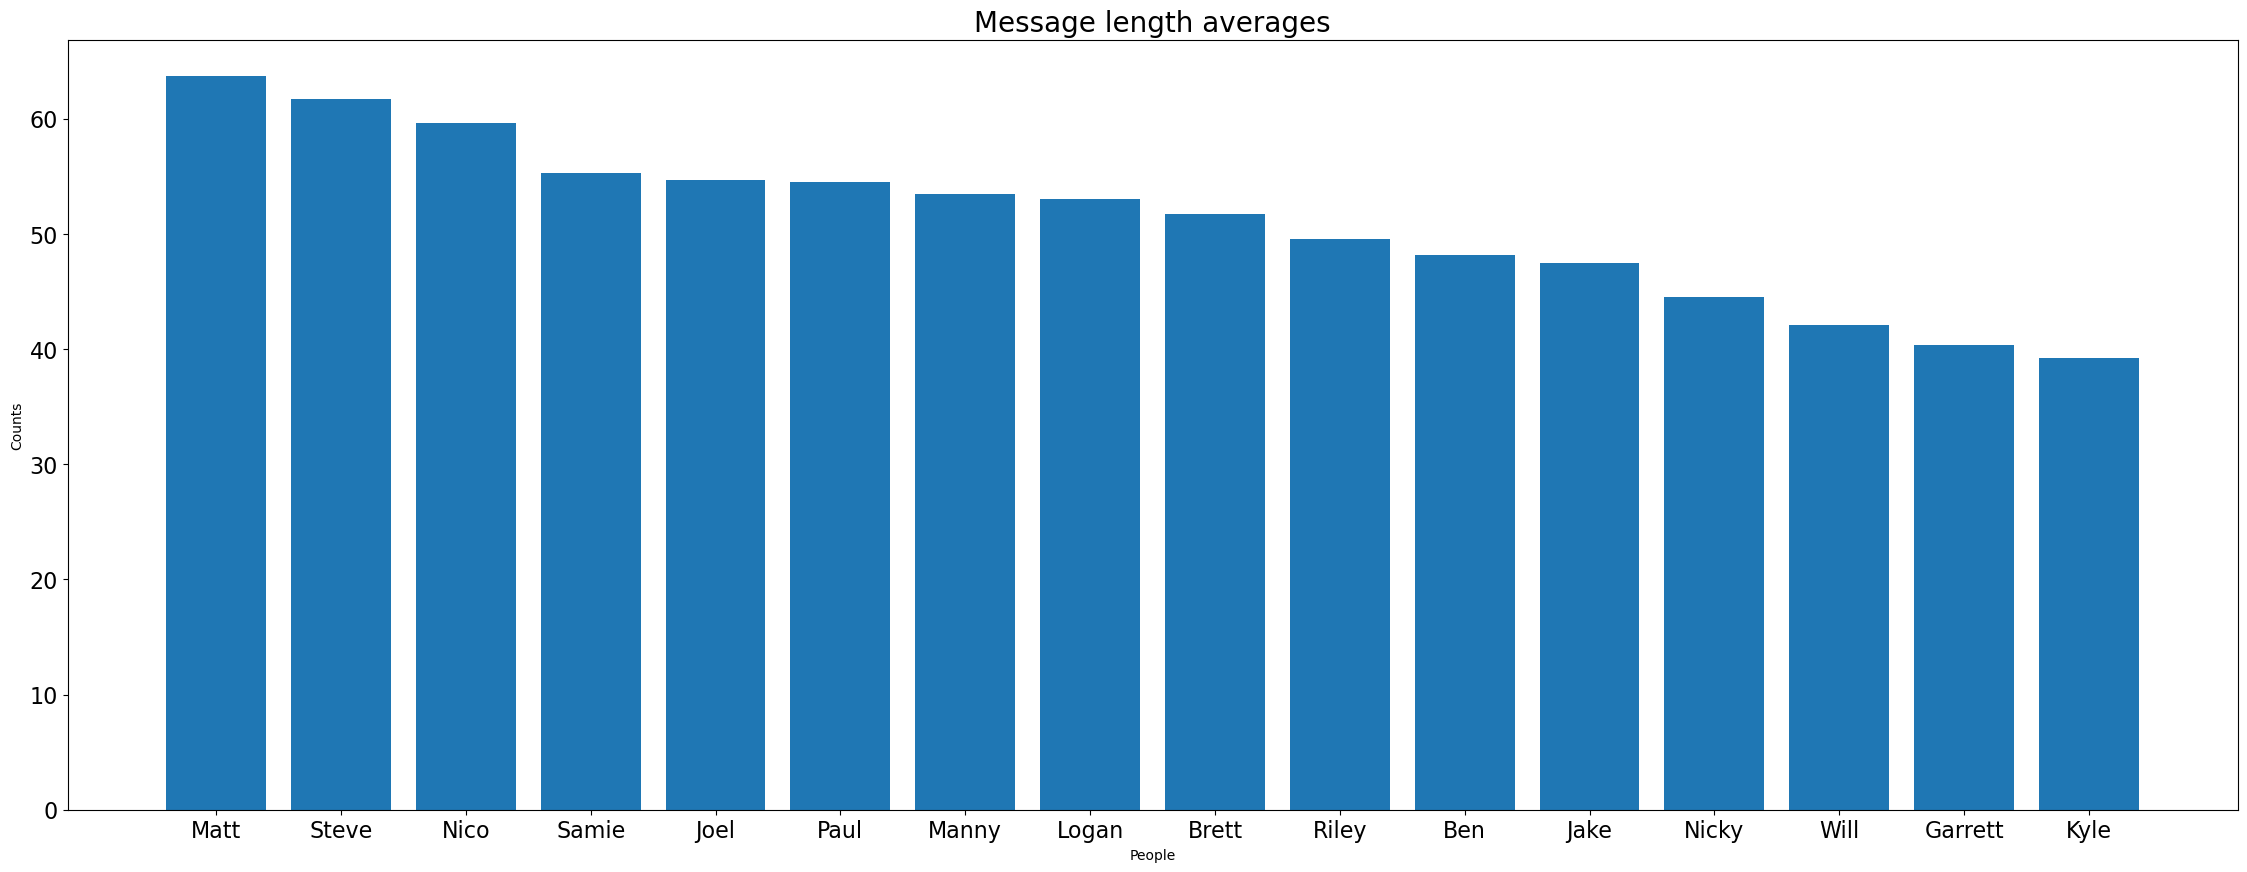

[('Matt', 63.68743088831552),
 ('Steve', 61.756560727944084),
 ('Nico', 59.63081009296149),
 ('Samie', 55.2780269058296),
 ('Joel', 54.66732026143791),
 ('Paul', 54.47577314395084),
 ('Manny', 53.43940375891121),
 ('Logan', 53.07377846992408),
 ('Brett', 51.74301675977654),
 ('Riley', 49.5979020979021),
 ('Ben', 48.16279069767442),
 ('Jake', 47.46901867773495),
 ('Nicky', 44.553720877629495),
 ('Will', 42.1),
 ('Garrett', 40.38157417482771),
 ('Kyle', 39.265306122448976)]

In [154]:
means = sorted(means, key=lambda x: x[1], reverse = True)
elements = [item[0] for item in means]
averages = [item[1] for item in means]
# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(elements, averages)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('Counts')
plt.title('Message length averages', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

means

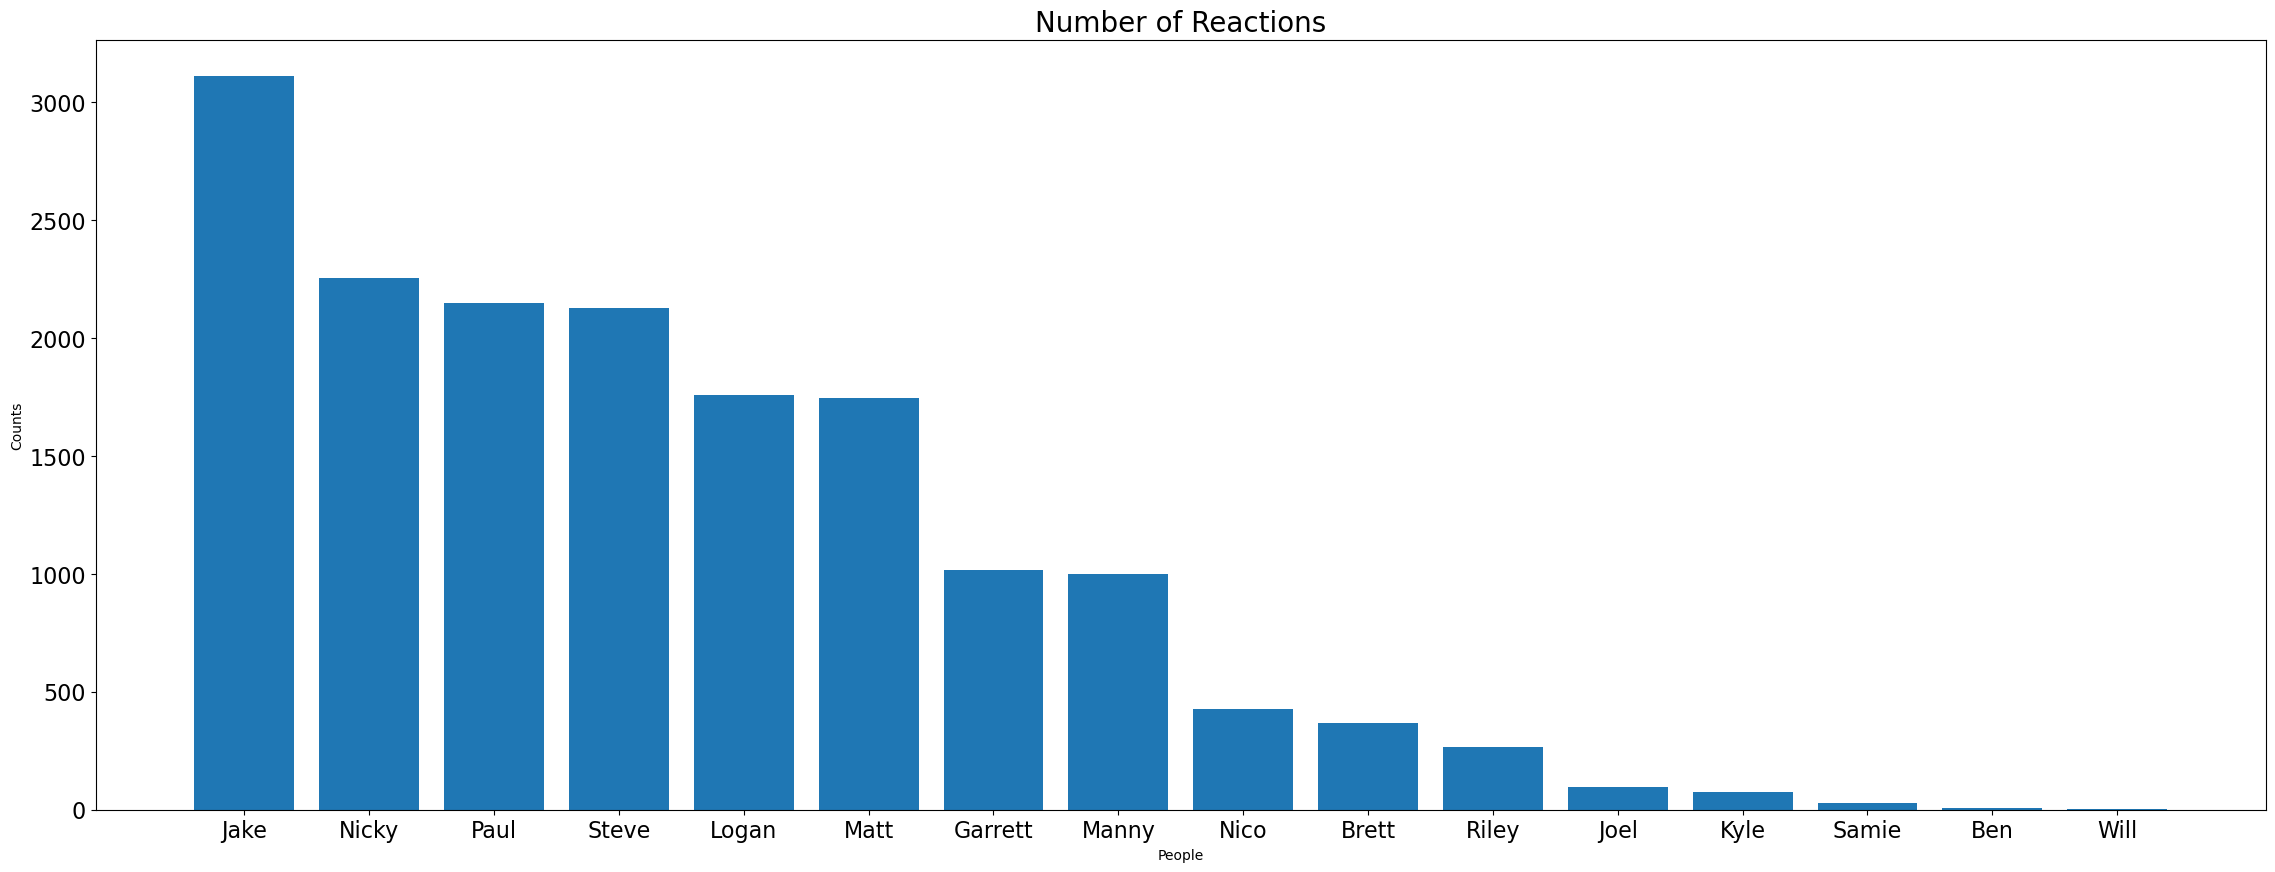

[('Jake', 3110),
 ('Nicky', 2255),
 ('Paul', 2150),
 ('Steve', 2129),
 ('Logan', 1760),
 ('Matt', 1745),
 ('Garrett', 1015),
 ('Manny', 999),
 ('Nico', 427),
 ('Brett', 367),
 ('Riley', 265),
 ('Joel', 96),
 ('Kyle', 77),
 ('Samie', 28),
 ('Ben', 9),
 ('Will', 3)]

In [155]:
# Number of reactions

total_reactions = []

for i in data["Sender Name"].unique():
    reactions = 0
    for j in range(len(data)):
        if data['Sender Name'][j] == i and (is_reaction(data['Text'][j]) == True):
            reactions += 1
    total_reactions.append((i, reactions))
total_reactions = sorted(total_reactions, key = lambda x: x[1], reverse = True)

elements = [item[0] for item in total_reactions]
reaction_number = [item[1] for item in total_reactions]

# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(elements, reaction_number)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('Counts')
plt.title('Number of Reactions', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

total_reactions

# This calculates the amount of reactions we give to other messages

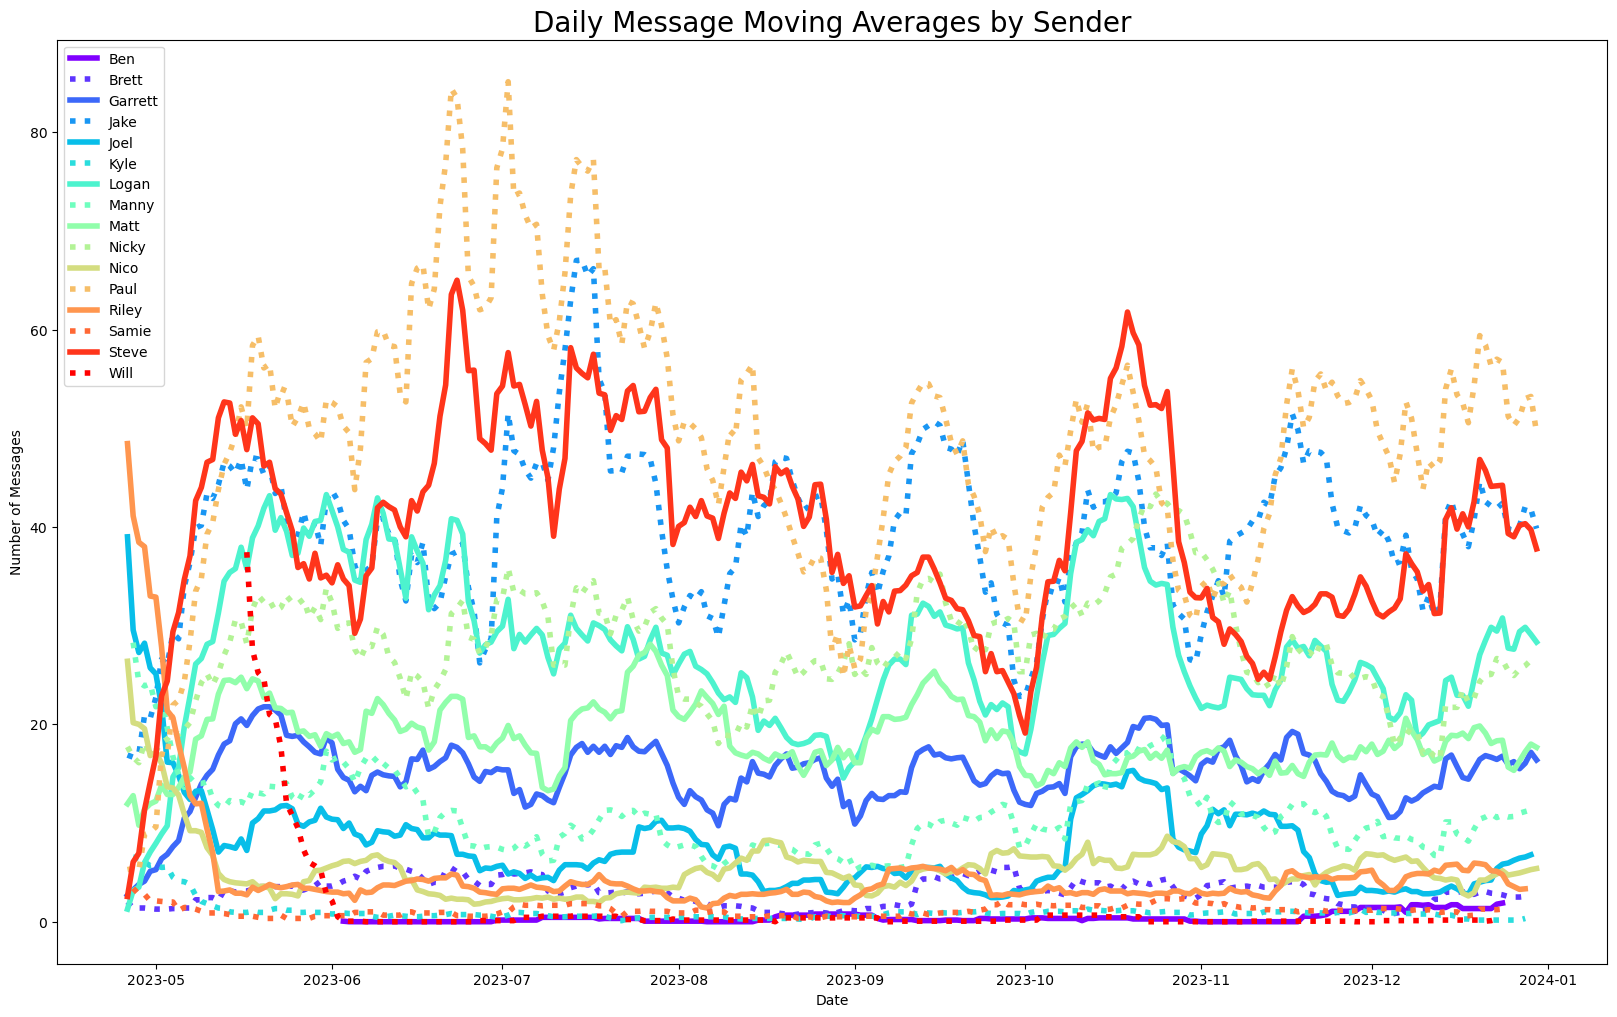

In [156]:
grouped_data = data
grouped_data = grouped_data.set_index(data['Message Date'])
grouped_data = grouped_data.groupby(grouped_data['Sender Name']).resample("D").count().rolling(window=18).mean()

grouped_data = grouped_data.drop(columns = ['Sender Name'])
grouped_data = grouped_data.drop(columns = ['Message Date'])
grouped_data = grouped_data.reset_index()

num_senders = len(data['Sender Name'].unique())
line_styles = ['solid', 'dotted']
colors = cm.rainbow(np.linspace(0, 1, num_senders))

plt.figure(figsize=(20, 12))

for i, sender in enumerate(grouped_data['Sender Name'].unique()):
    line_style = line_styles[i % len(line_styles)]
    sender_data = grouped_data[grouped_data['Sender Name'] == sender]
    plt.plot(sender_data['Message Date'], sender_data['Text'], label=sender, color = colors[i], linestyle=line_style, 
            linewidth=4)
    
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.title('Daily Message Moving Averages by Sender', fontsize = 20)
plt.legend()
plt.show()


In [157]:
# Most to Least active days

date_data = data
date_data.set_index('Message Date', inplace = True)
daily_count = date_data.resample('D').count()
daily_count = daily_count.drop(columns = ['Sender Name', 'Replying to', 'Attachment type'])
daily_count = daily_count.sort_values(by='Text', ascending=False)
daily_count.head()

,Text
Message Date,
2023-12-14,884
2023-10-09,832
2023-06-07,779
2023-06-30,768
2023-07-13,754


In [158]:
stop_char = '“'

master_react_dict = {}

for i, j in enumerate(data['Sender Name'].unique()):
    master_react_dict[j] = {'like': 0, 'love': 0, 'dislike': 0, 'laugh': 0, 'question': 0, 'exclaim': 0} 

for i, j in enumerate(data['Text']):
    if is_reaction(j):
        reaction_type = is_reaction_type(j)
        index = j.find(stop_char)
        substring = j[index+1:]
        substring = substring[:10]
        #print(substring)
        stop = max(0, i-100)
        for k in range(i, stop, -1):
            if data['Text'][k].startswith(substring):
                
                sender = data['Sender Name'][k]
                master_react_dict[sender][reaction_type] += 1
                #print(reaction_type)
                #print(sender)
                
    #if i == 500:
        #break
#master_react_dict            

In [159]:
react_types = [i for i in master_react_dict['Logan'].keys()]
sorted_reactions = [[]]

for react_type in react_types:
    current_reactions = []
    for sender in master_react_dict.keys():
        current_reactions.append((sender, master_react_dict[sender][react_type]))
    # Sort current reactions for this type and add to sorted_reactions
    sorted_reactions.append(sorted(current_reactions, key=lambda x: x[1], reverse=True))
sorted_reactions = sorted_reactions[1:]
sorted_reactions_df = pd.DataFrame(sorted_reactions, index=react_types).T
sorted_reactions_df

,like,love,dislike,laugh,question,exclaim
0,"(Paul, 339)","(Jake, 510)","(Jake, 34)","(Jake, 5372)","(Steve, 44)","(Paul, 364)"
1,"(Jake, 286)","(Paul, 462)","(Steve, 34)","(Logan, 4395)","(Nicky, 14)","(Jake, 356)"
2,"(Logan, 246)","(Matt, 426)","(Logan, 29)","(Steve, 4361)","(Logan, 10)","(Logan, 292)"
3,"(Garrett, 218)","(Steve, 326)","(Nicky, 23)","(Paul, 3908)","(Joel, 8)","(Matt, 179)"
4,"(Matt, 201)","(Nicky, 325)","(Paul, 21)","(Nicky, 2816)","(Jake, 6)","(Garrett, 125)"
5,"(Steve, 158)","(Logan, 251)","(Joel, 16)","(Matt, 2618)","(Garrett, 6)","(Nicky, 95)"
6,"(Nicky, 136)","(Manny, 183)","(Garrett, 11)","(Garrett, 2045)","(Paul, 5)","(Steve, 72)"
7,"(Joel, 89)","(Garrett, 158)","(Matt, 8)","(Manny, 1732)","(Matt, 4)","(Joel, 68)"
8,"(Manny, 70)","(Joel, 134)","(Nico, 4)","(Brett, 701)","(Manny, 3)","(Manny, 57)"
9,"(Nico, 57)","(Nico, 126)","(Samie, 3)","(Riley, 651)","(Nico, 2)","(Nico, 42)"


C:\Users\Logan\AppData\Local\Temp\ipykernel_34800\3713743647.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in sorted_reactions_df.iteritems():


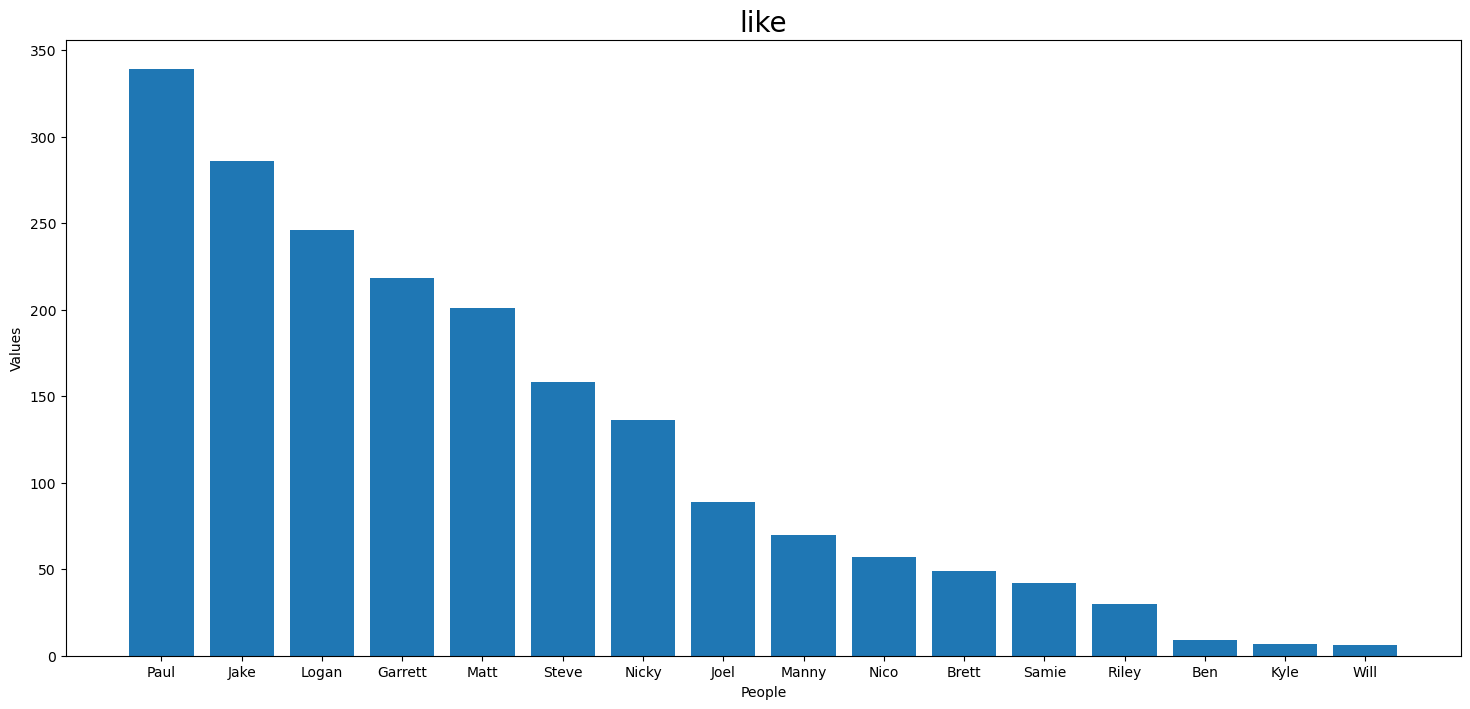

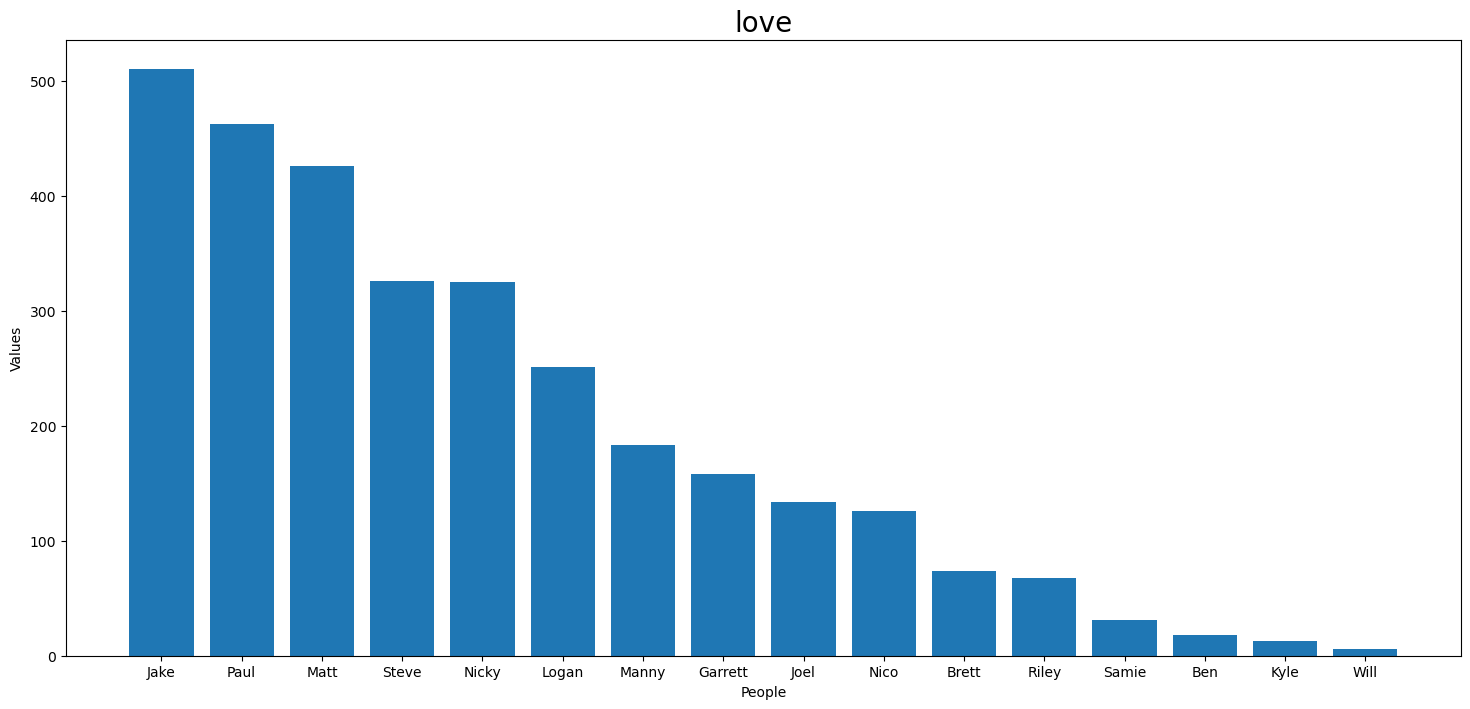

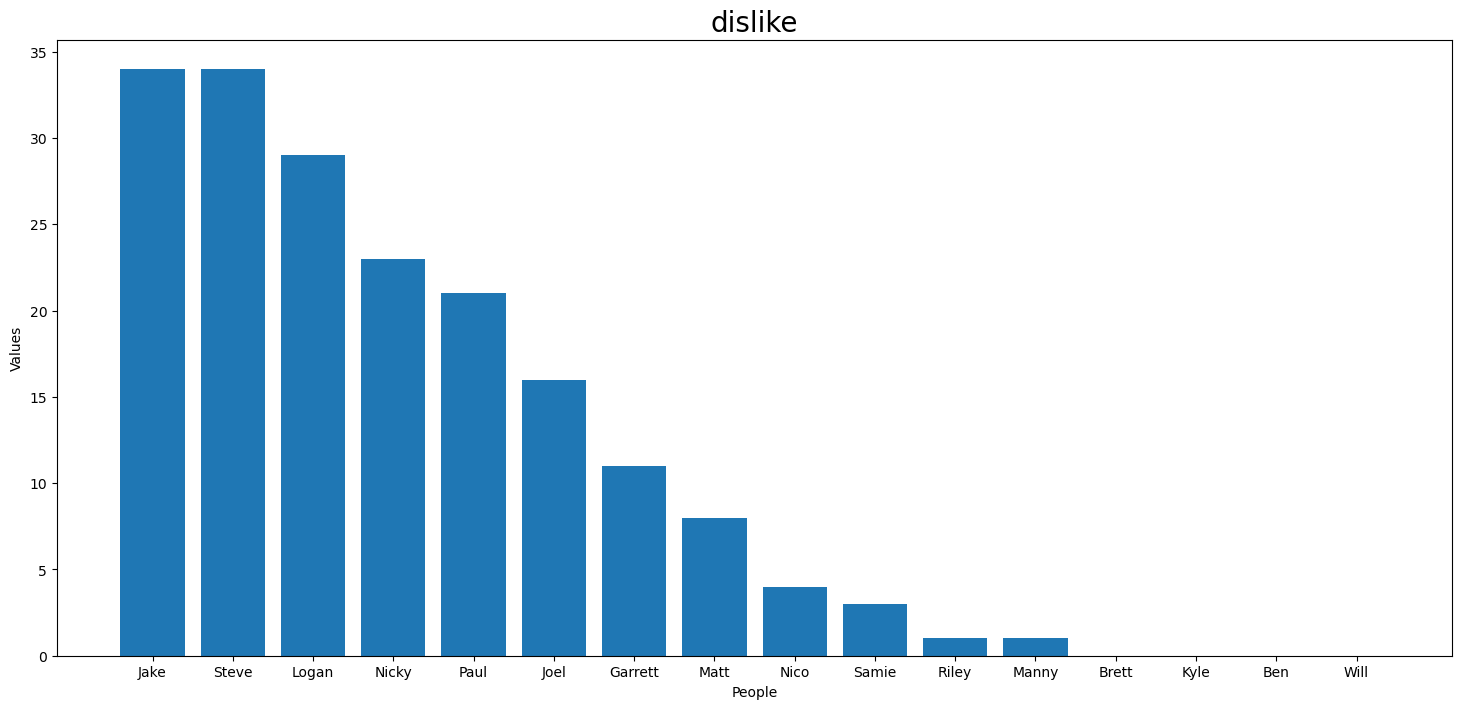

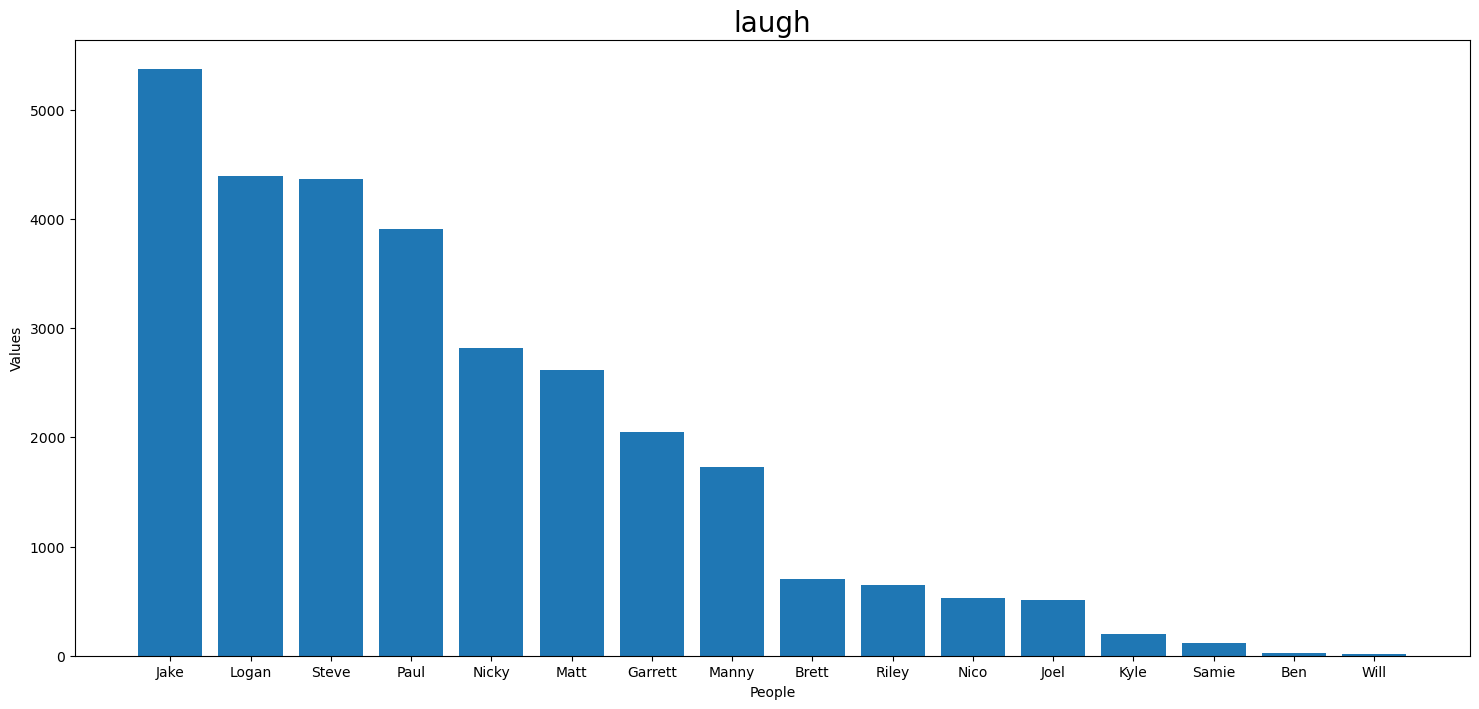

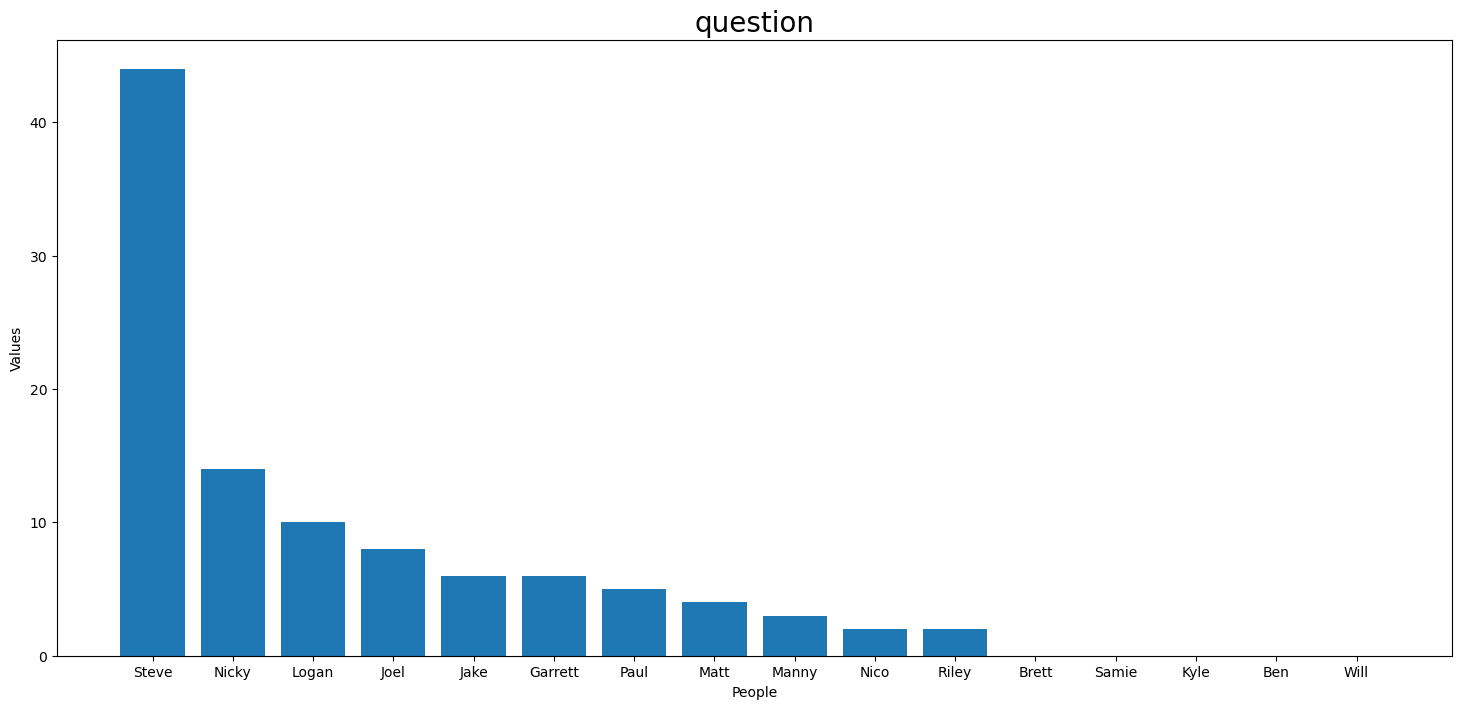

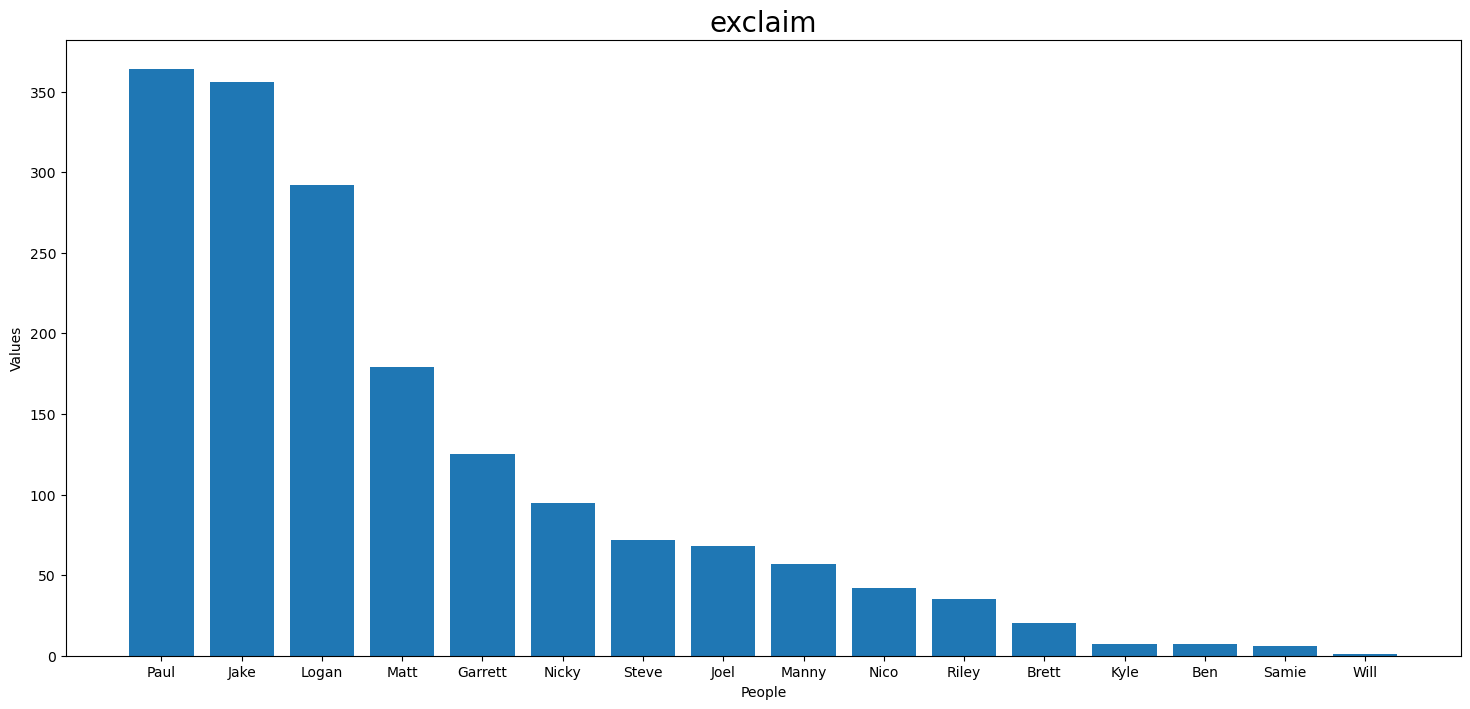

In [160]:
# Iterate over columns and create individual bar plots
for col_name, col_data in sorted_reactions_df.iteritems():
    x_labels, heights = zip(*col_data)  # Unpack tuples
    
    # Create a new figure for each column
    plt.figure(figsize=(18, 8))  # Adjust figsize as needed
    plt.bar(x_labels, heights)
    plt.title(col_name, fontsize = 20)
    plt.xlabel('People')
    plt.ylabel('Values')
    plt.show()
    # Display the current plot
    
# These plots depict the number of each reaction that each person recieved on their messages

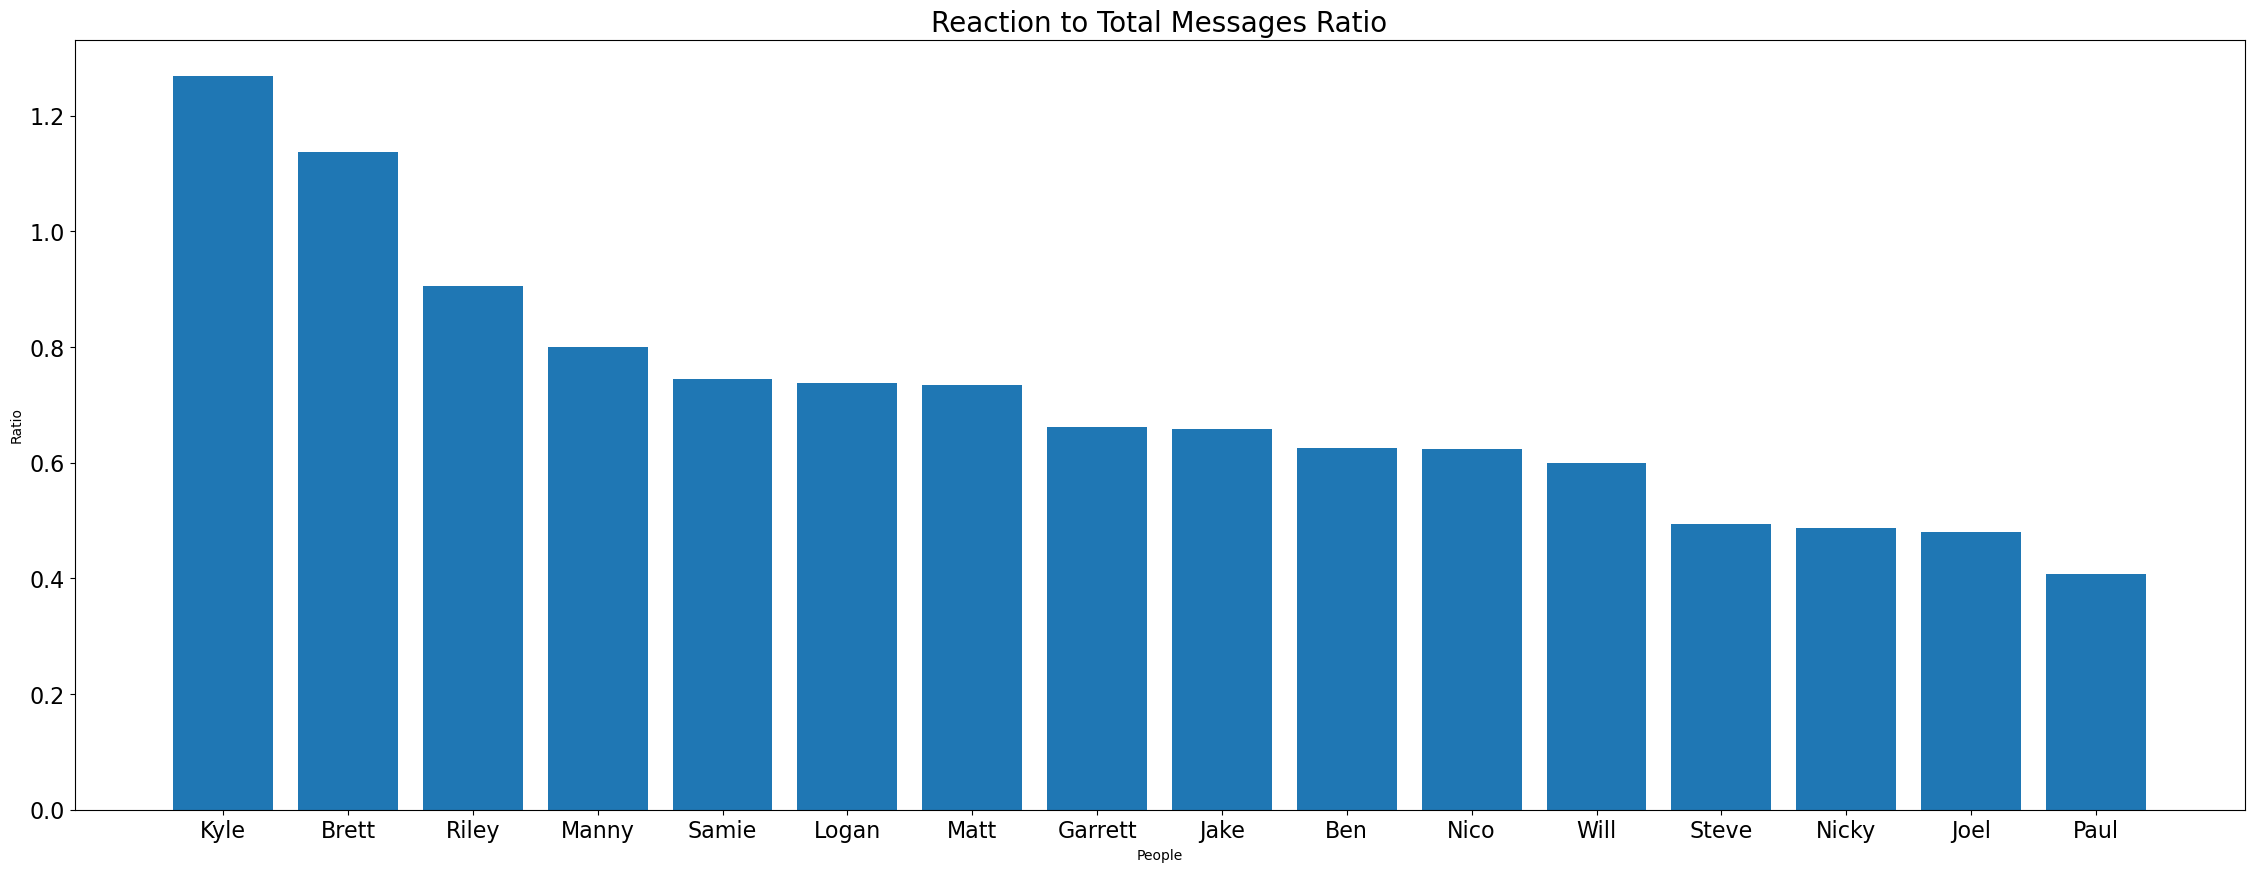

[('Kyle', 1.2681564245810055),
 ('Brett', 1.137466307277628),
 ('Riley', 0.905638665132336),
 ('Manny', 0.8007827788649706),
 ('Samie', 0.7444444444444445),
 ('Logan', 0.7379203164735801),
 ('Matt', 0.7349732620320856),
 ('Garrett', 0.6610781532112459),
 ('Jake', 0.6581110888309605),
 ('Ben', 0.6262626262626263),
 ('Nico', 0.6239669421487604),
 ('Will', 0.6),
 ('Steve', 0.49382105783489866),
 ('Nicky', 0.48790611134964934),
 ('Joel', 0.48002316155182395),
 ('Paul', 0.4083773826685888)]

In [161]:
react_message_ratio = []

for i, j in enumerate(data['Sender Name'].unique()):
    r = np.sum([k for k in master_react_dict[j].values()])
    rt = r/total_message_count[j]
    react_message_ratio.append((j, rt))
react_message_ratio = sorted(react_message_ratio, key = lambda x: x[1], reverse = True)

temp_people = [item[0] for item in react_message_ratio]
reaction_r = [item[1] for item in react_message_ratio]

# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(temp_people, reaction_r)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('Ratio')
plt.title('Reaction to Total Messages Ratio', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()


react_message_ratio

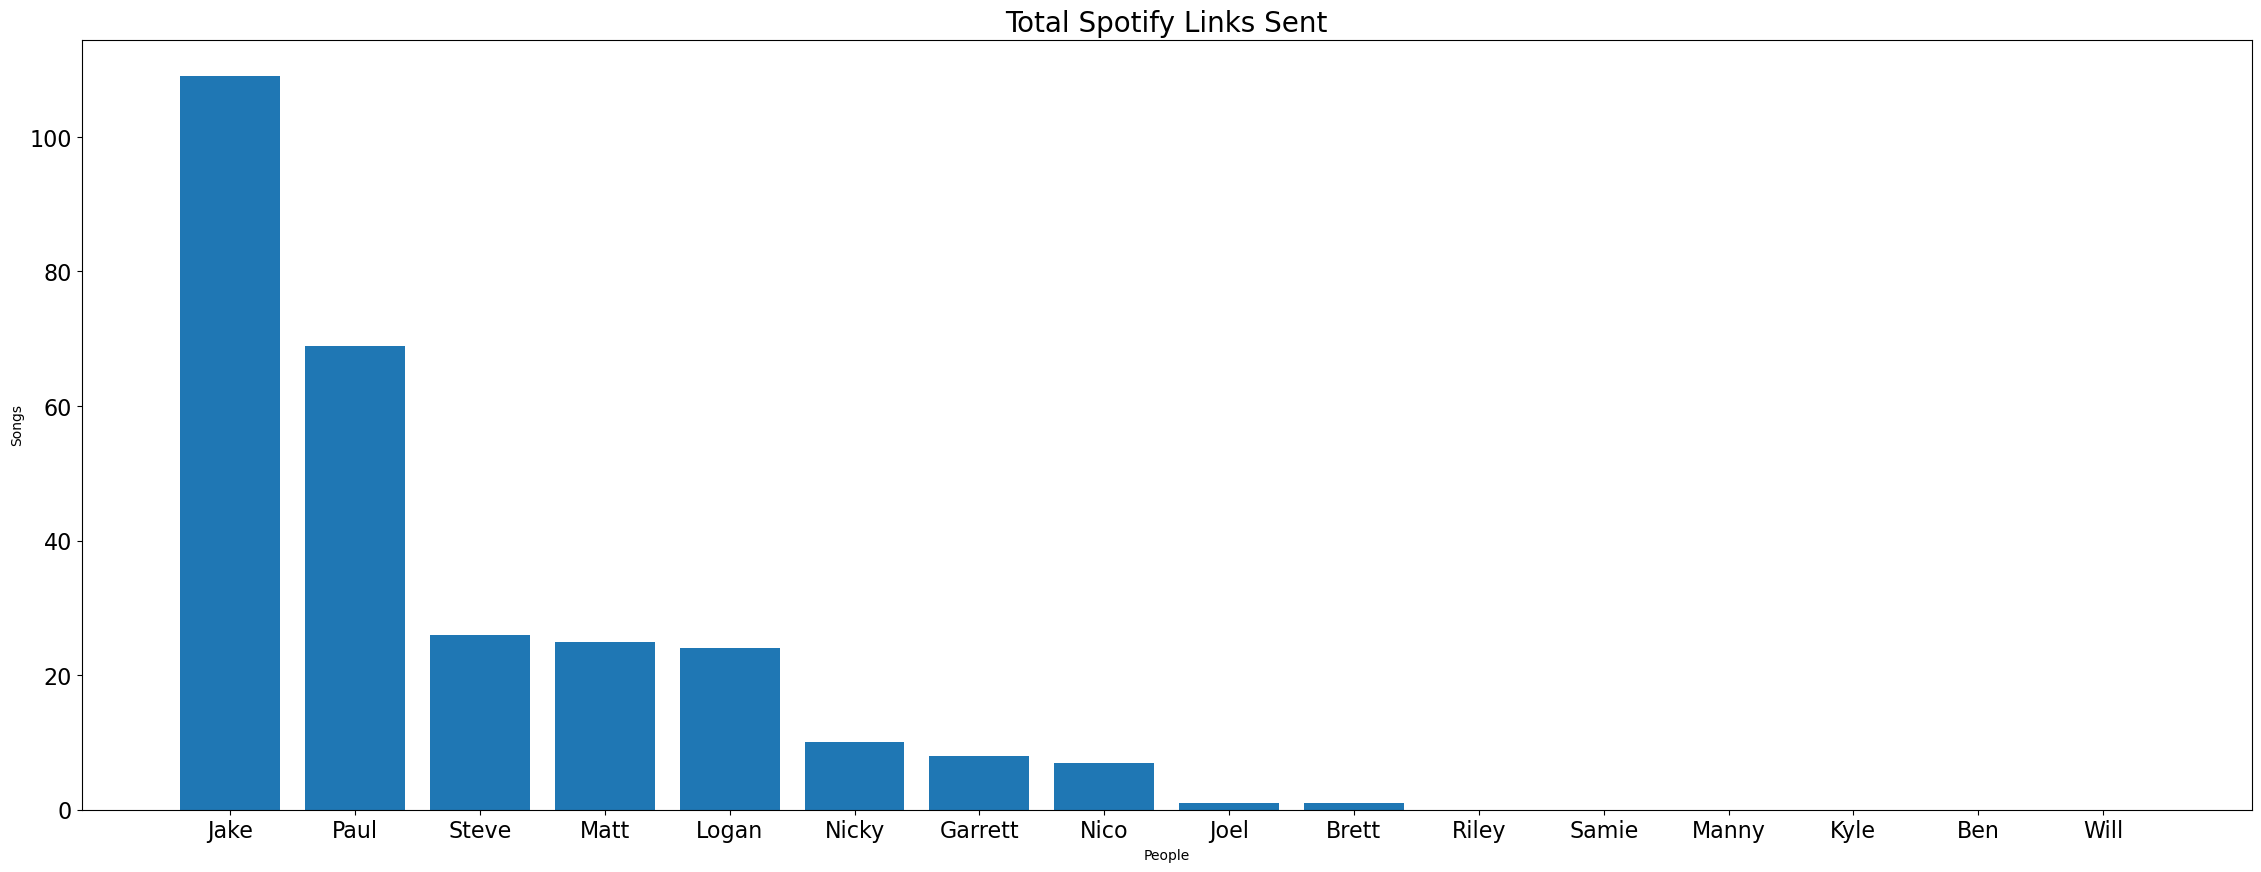

[('Jake', 109),
 ('Paul', 69),
 ('Steve', 26),
 ('Matt', 25),
 ('Logan', 24),
 ('Nicky', 10),
 ('Garrett', 8),
 ('Nico', 7),
 ('Joel', 1),
 ('Brett', 1),
 ('Riley', 0),
 ('Samie', 0),
 ('Manny', 0),
 ('Kyle', 0),
 ('Ben', 0),
 ('Will', 0)]

In [162]:
spotify_link = 'https://open.spotify.com/track'
spotify_book = {i:0 for i in data['Sender Name'].unique()}
for i, text in enumerate(data['Text']):
    if text.startswith(spotify_link):
        sender = data['Sender Name'][i]
        spotify_book[sender] += 1
spotify_book = sorted(spotify_book.items(), key = lambda x: x[1], reverse = True)

temp_people = [item[0] for item in spotify_book]
songs = [item[1] for item in spotify_book]


# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(temp_people, songs)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('Songs')
plt.title('Total Spotify Links Sent', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

spotify_book

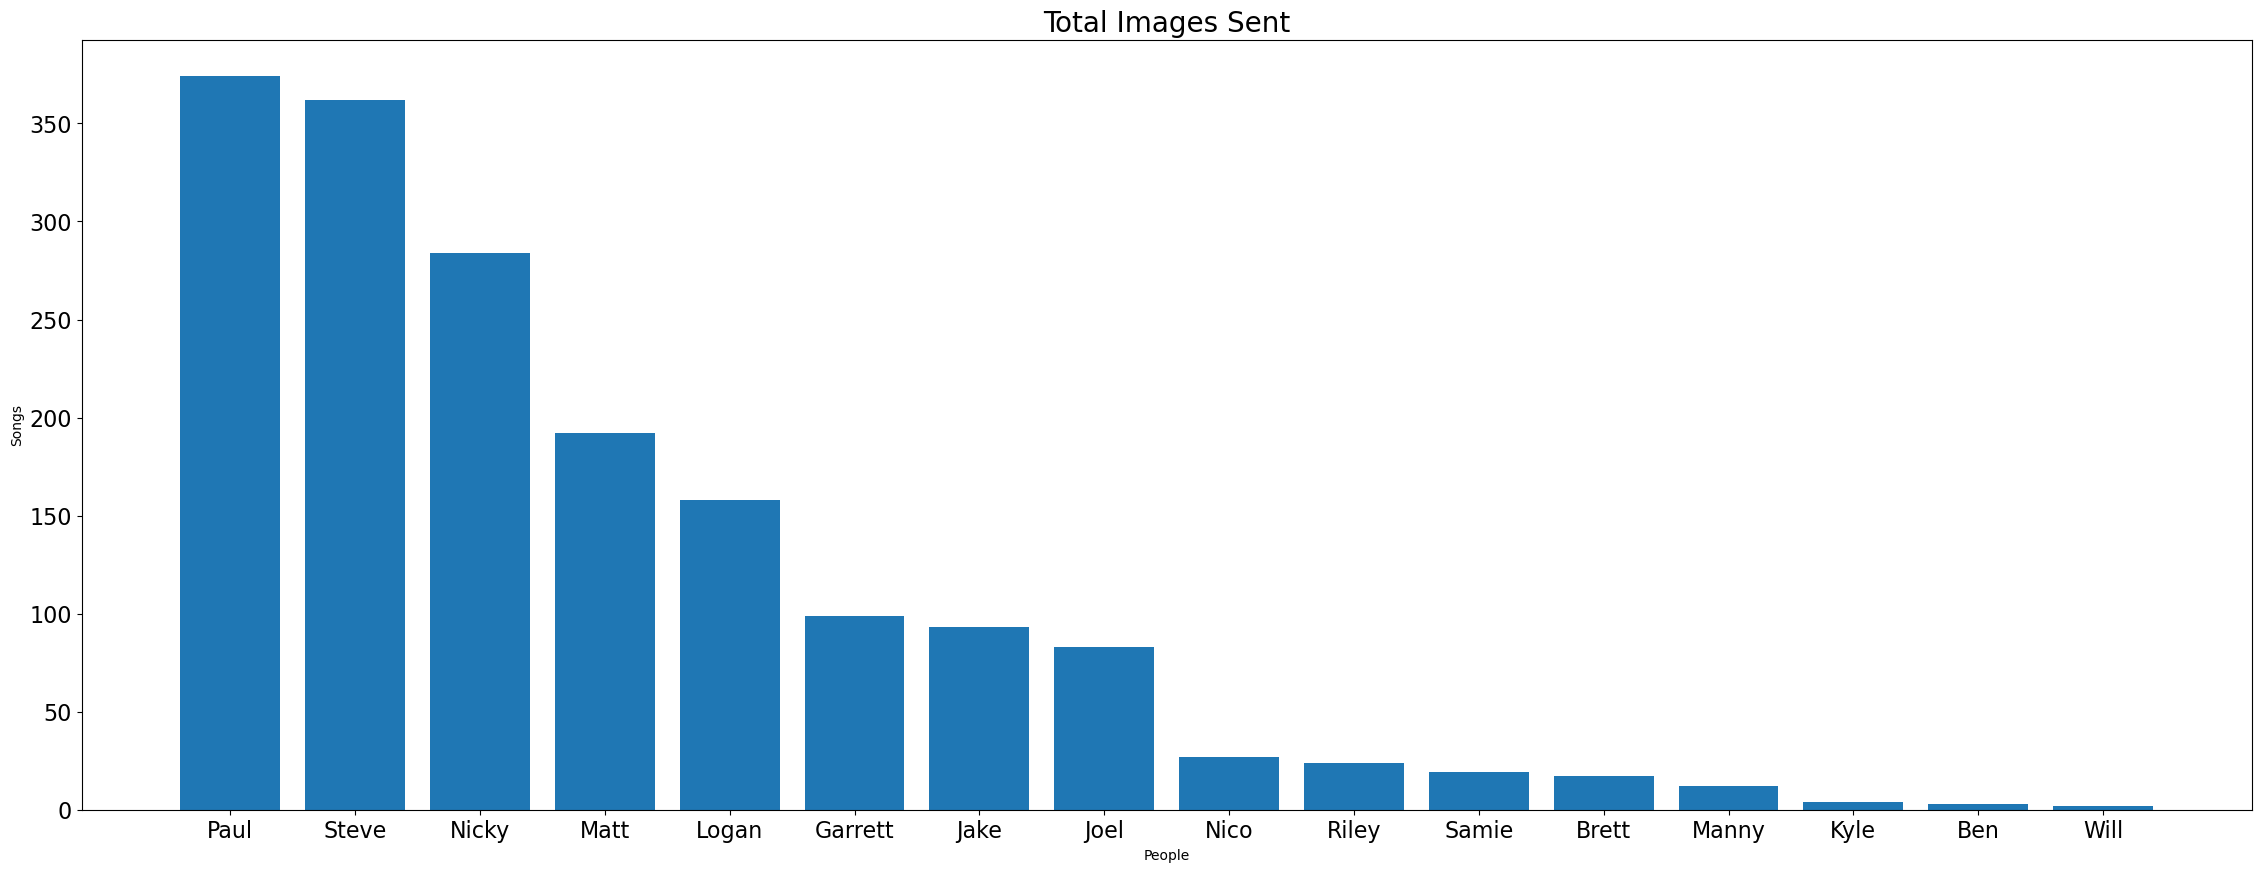

[('Paul', 374),
 ('Steve', 362),
 ('Nicky', 284),
 ('Matt', 192),
 ('Logan', 158),
 ('Garrett', 99),
 ('Jake', 93),
 ('Joel', 83),
 ('Nico', 27),
 ('Riley', 24),
 ('Samie', 19),
 ('Brett', 17),
 ('Manny', 12),
 ('Kyle', 4),
 ('Ben', 3),
 ('Will', 2)]

In [163]:
img = 'Image'
img_book = {i:0 for i in data['Sender Name'].unique()}
for i, text in enumerate(data['Attachment type']):
    if text.startswith(img):
        sender = data['Sender Name'][i]
        img_book[sender] += 1
img_book = sorted(img_book.items(), key = lambda x: x[1], reverse = True)

temp_people = [item[0] for item in img_book]
pics = [item[1] for item in img_book]


# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(temp_people, pics)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('Songs')
plt.title('Total Images Sent', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

img_book

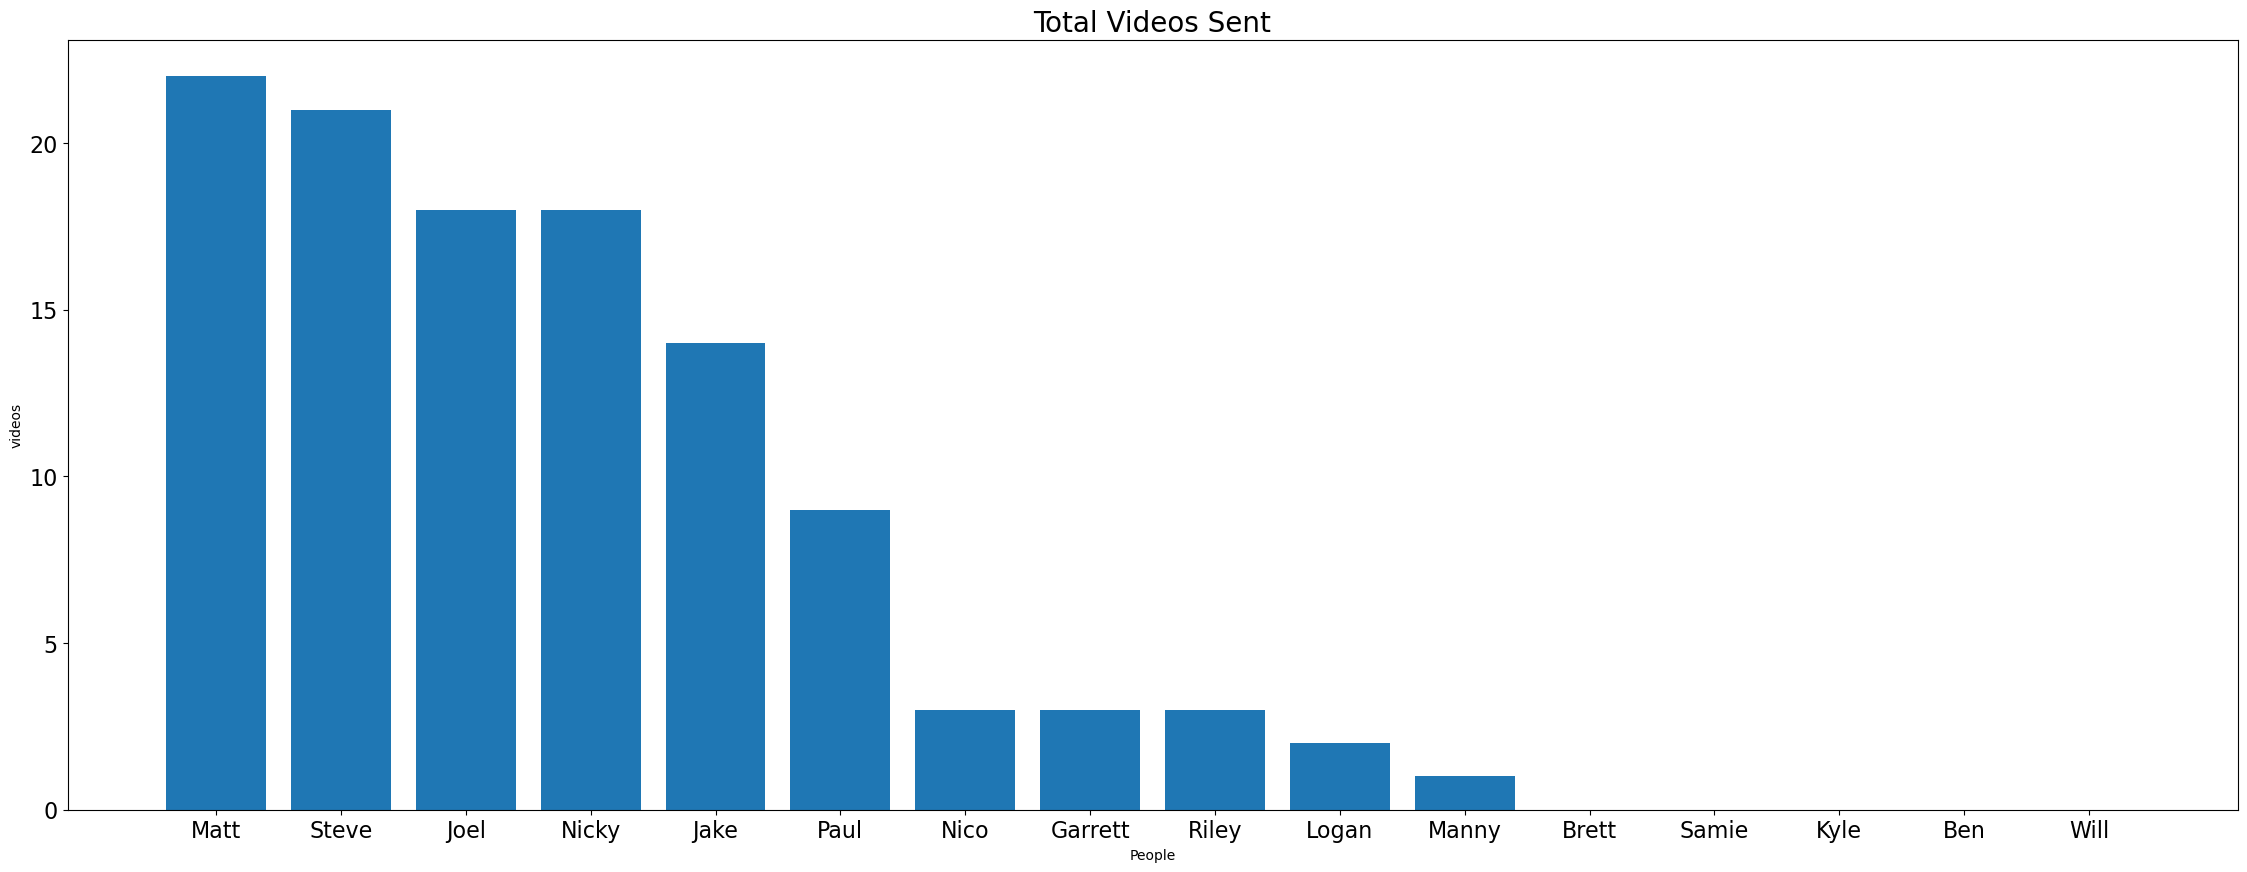

[('Matt', 22),
 ('Steve', 21),
 ('Joel', 18),
 ('Nicky', 18),
 ('Jake', 14),
 ('Paul', 9),
 ('Nico', 3),
 ('Garrett', 3),
 ('Riley', 3),
 ('Logan', 2),
 ('Manny', 1),
 ('Brett', 0),
 ('Samie', 0),
 ('Kyle', 0),
 ('Ben', 0),
 ('Will', 0)]

In [164]:
vid = 'Video'
vid_book = {i:0 for i in data['Sender Name'].unique()}
for i, text in enumerate(data['Attachment type']):
    if text.startswith(vid):
        sender = data['Sender Name'][i]
        vid_book[sender] += 1
vid_book = sorted(vid_book.items(), key = lambda x: x[1], reverse = True)

temp_people = [item[0] for item in vid_book]
vids = [item[1] for item in vid_book]


# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(temp_people, vids)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('videos')
plt.title('Total Videos Sent', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

vid_book

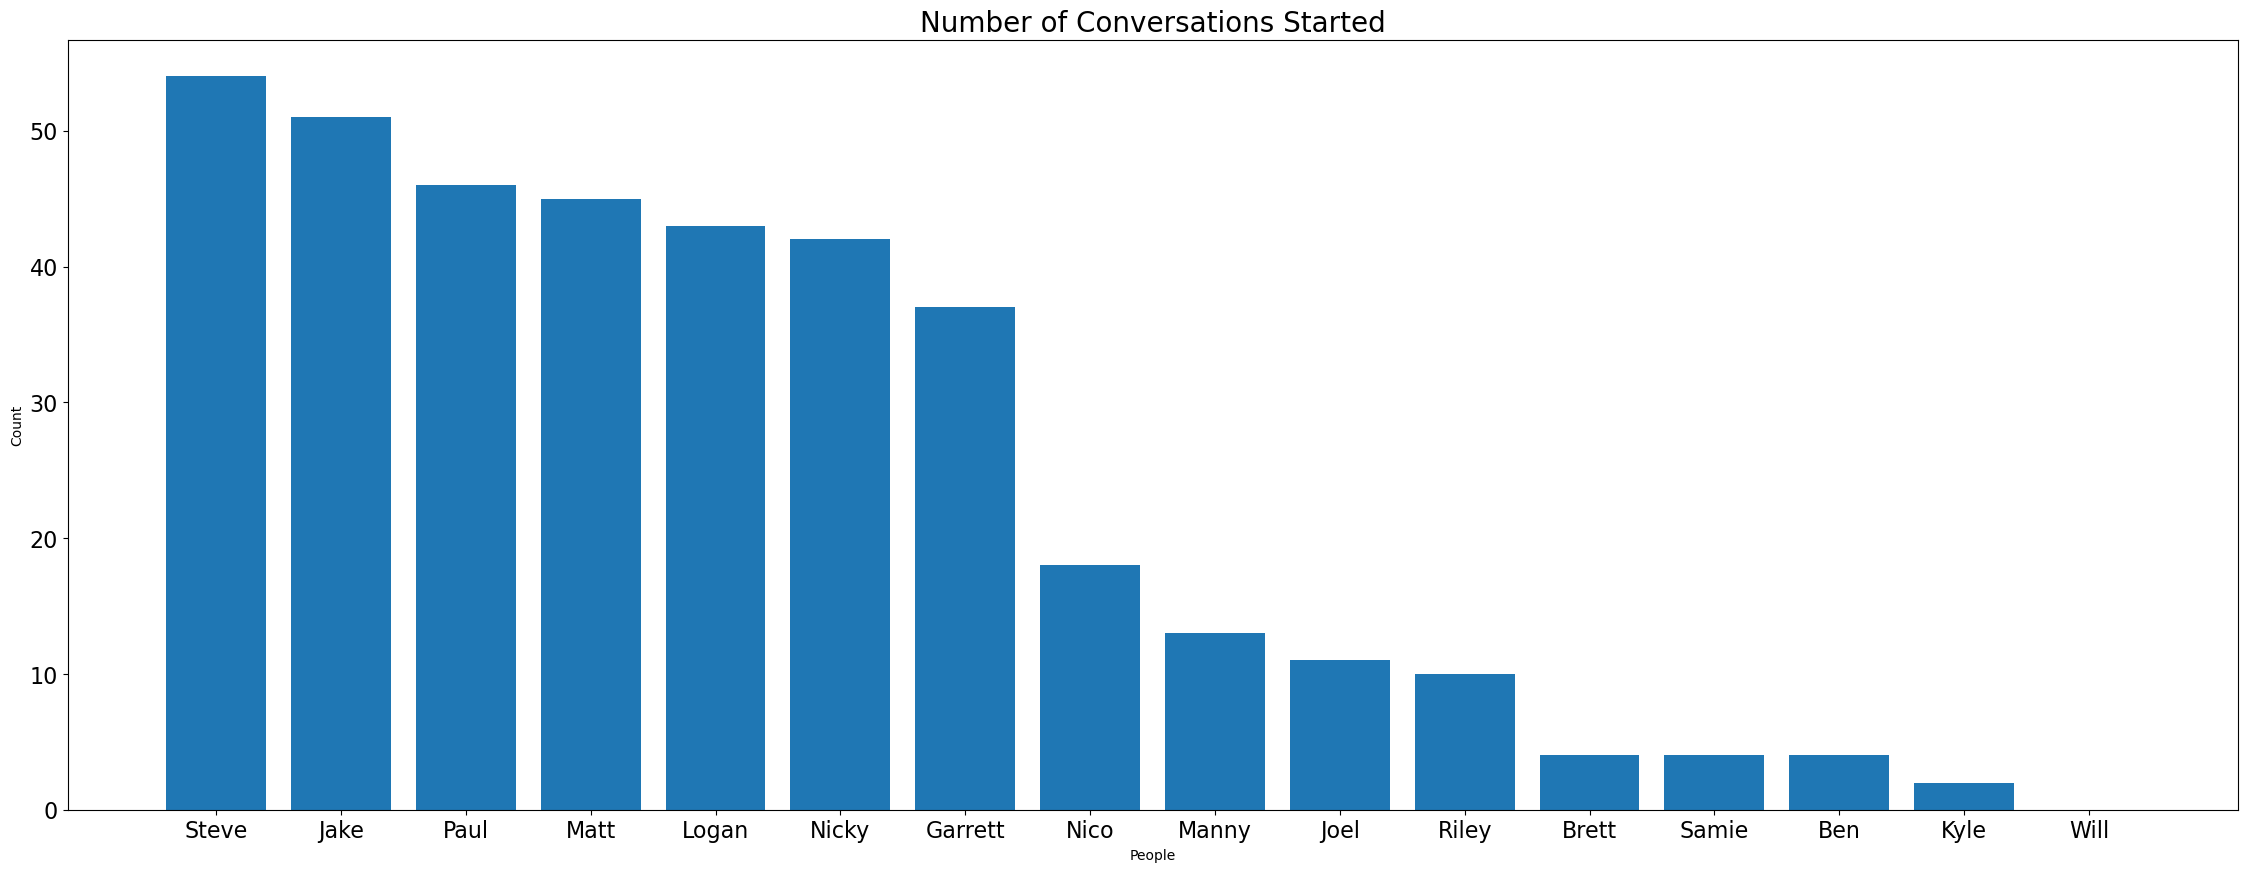

[('Steve', 54),
 ('Jake', 51),
 ('Paul', 46),
 ('Matt', 45),
 ('Logan', 43),
 ('Nicky', 42),
 ('Garrett', 37),
 ('Nico', 18),
 ('Manny', 13),
 ('Joel', 11),
 ('Riley', 10),
 ('Brett', 4),
 ('Samie', 4),
 ('Ben', 4),
 ('Kyle', 2),
 ('Will', 0)]

In [165]:
convo_book = {i:0 for i in data['Sender Name'].unique()}

for i in range(len(data)):
    if i == 0:
        continue
    else:
        time_delta = data.index[i] - data.index[i-1]
        t_d = time_delta.total_seconds()
        if t_d >= 3600:
            flag = True
            for k in range(i+1, min(len(data),i+31)):
                time_delta_2 = data.index[k]-data.index[k-1]
                t_d_2 = time_delta_2.total_seconds()
                if t_d_2 >= 3600:
                    flag = False
            if flag == True:
                sender = data['Sender Name'][i]
                convo_book[sender] += 1
            
convo_book = sorted(convo_book.items(), key = lambda x: x[1], reverse = True)

temp_people = [item[0] for item in convo_book]
times = [item[1] for item in convo_book]


# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(temp_people, times)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('Count')
plt.title('Number of Conversations Started', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()

convo_book

# This adds up everytime a message was sent by each person after at least 1 hour of no messages
# that was then followed by at least 30 other messages

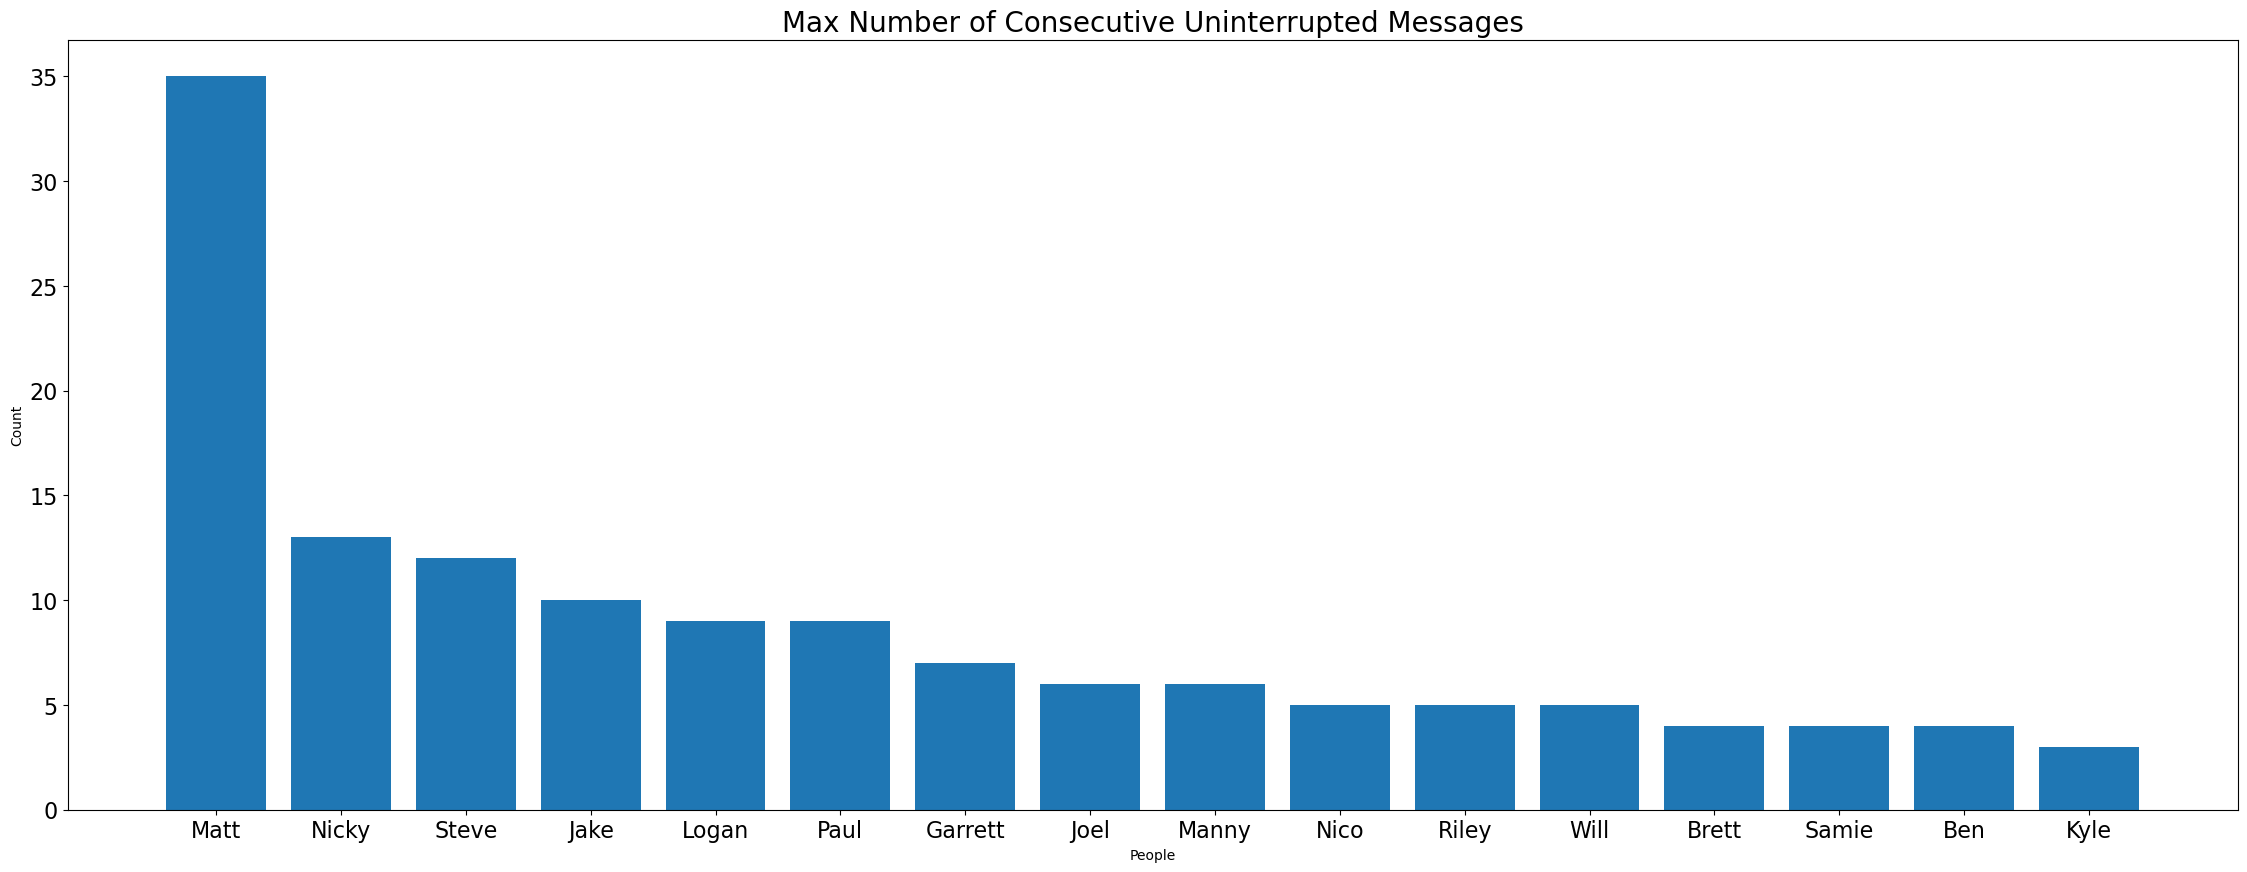

[('Matt', 35),
 ('Nicky', 13),
 ('Steve', 12),
 ('Jake', 10),
 ('Logan', 9),
 ('Paul', 9),
 ('Garrett', 7),
 ('Joel', 6),
 ('Manny', 6),
 ('Nico', 5),
 ('Riley', 5),
 ('Will', 5),
 ('Brett', 4),
 ('Samie', 4),
 ('Ben', 4),
 ('Kyle', 3)]

In [166]:
spam_book = {i:[] for i in data['Sender Name'].unique()}
count = 1
for i, j in enumerate(data['Sender Name']):
    if i == 0:
        last_j = j
        continue
    if data['Sender Name'][i] == data['Sender Name'][i-1]:
        count += 1
    else:
        spam_book[last_j].append(count)
        count = 1
    last_j = j
spam_book_avg = {i: np.max(spam_book[i]) for i in spam_book.keys()}
spam_book_avg = sorted(spam_book_avg.items(), key = lambda x: x[1], reverse = True)

temp_people = [item[0] for item in spam_book_avg]
length = [item[1] for item in spam_book_avg]


# Create the bar plot
plt.figure(figsize=(28, 10))  # Optional: Adjust the size of the plot
plt.bar(temp_people, length)

# Adding labels and title
plt.xlabel('People')
plt.ylabel('Count')
plt.title('Max Number of Consecutive Uninterrupted Messages', fontsize = 20)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.show()


spam_book_avg

# This is skewed because matt sent 35 pictures and videos from a vacation 

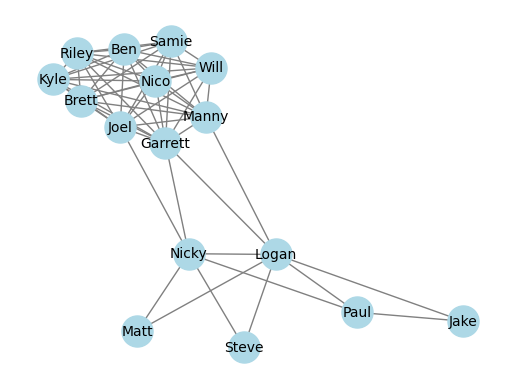

In [145]:
lists = [total_message_counts, means, total_reactions, react_message_ratio, spotify_book, img_book,
       vid_book, convo_book, spam_book_avg, sorted_reactions_df['like'], sorted_reactions_df['dislike'], 
        sorted_reactions_df['love'], sorted_reactions_df['laugh'], sorted_reactions_df['exclaim'],
         sorted_reactions_df['question']]

names = [i for i in data['Sender Name'].unique()]

graph_list = []

for i, j in enumerate(names):
    #row1 = [j]
    row = [get_number_from_tuples(j, l) for l in lists]
    #row1.append(row)
    graph_list.append(row)

scaler = MinMaxScaler()
graph_list = scaler.fit_transform(graph_list)

adj_matrix = adjacency_matrix(graph_list, 1.6)

# Create a graph from the adjacency matrix
label_dict = {i:j for i, j in enumerate(names)}
G = nx.from_numpy_matrix(adj_matrix)
G = nx.relabel_nodes(G, label_dict)
fig, ax = plt.subplots()

# Draw the graph specifying the axes
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=ax, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)

# Show the plot
plt.show()

# This is a graph network depicting group chat activity similarity 